In [ ]:
# import usefull libraries for manipulation and visualization
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

In [ ]:
# import data//
train = pd.read_csv('train (1).csv', parse_dates=['Date'])  # Training data
features = pd.read_csv('features (1).csv', parse_dates=['Date']) # Features
stores = pd.read_csv('stores (1).csv')  # Store Details

In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
train_stores = pd.merge(left=train, right=stores, how='left', on='Store')

In [ ]:
train_stores = pd.merge(left=train_stores, right=features, how='left', on=['Store','Date','IsHoliday'])


In [ ]:
df = pd.merge(left=train_stores, right=features, how='left', on=['Store','Date','IsHoliday'])
#df.to_excel('data_sales.xlsx')
# Merging Train data, Stores and Features


In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature_x,Fuel_Price_x,MarkDown1_x,...,Unemployment_x,Temperature_y,Fuel_Price_y,MarkDown1_y,MarkDown2_y,MarkDown3_y,MarkDown4_y,MarkDown5_y,CPI_y,Unemployment_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,...,8.106,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,...,8.106,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,...,8.106,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,...,8.106,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,...,8.106,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [ ]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature_x,Fuel_Price_x,MarkDown1_x,...,Unemployment_x,Temperature_y,Fuel_Price_y,MarkDown1_y,MarkDown2_y,MarkDown3_y,MarkDown4_y,MarkDown5_y,CPI_y,Unemployment_y
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,...,8.684,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,...,8.667,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,...,8.667,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,...,8.667,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667
421569,45,98,2012-10-26,1076.80,False,B,118221,58.85,3.882,4018.91,...,8.667,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           421570 non-null  int64         
 1   Dept            421570 non-null  int64         
 2   Date            421570 non-null  datetime64[ns]
 3   Weekly_Sales    421570 non-null  float64       
 4   IsHoliday       421570 non-null  bool          
 5   Type            421570 non-null  object        
 6   Size            421570 non-null  int64         
 7   Temperature_x   421570 non-null  float64       
 8   Fuel_Price_x    421570 non-null  float64       
 9   MarkDown1_x     150681 non-null  float64       
 10  MarkDown2_x     111248 non-null  float64       
 11  MarkDown3_x     137091 non-null  float64       
 12  MarkDown4_x     134967 non-null  float64       
 13  MarkDown5_x     151432 non-null  float64       
 14  CPI_x           421570 non-null  flo

In [ ]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature_x,Fuel_Price_x,MarkDown1_x,MarkDown2_x,MarkDown3_x,...,Unemployment_x,Temperature_y,Fuel_Price_y,MarkDown1_y,MarkDown2_y,MarkDown3_y,MarkDown4_y,MarkDown5_y,CPI_y,Unemployment_y
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,...,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,...,7.960289,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,...,3.879000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,...,6.891000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,...,7.866000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,...,8.572000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,...,14.313000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,...,1.863296,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature_x,0
Fuel_Price_x,0
MarkDown1_x,270889


In [ ]:
df = df.drop(columns=['MarkDown1_x','MarkDown2_x','MarkDown3_x','MarkDown4_x','MarkDown5_x'])

In [ ]:
df = df.drop(columns=['MarkDown1_y','MarkDown2_y','MarkDown3_y','MarkDown4_y','MarkDown5_y'])

In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature_x,0
Fuel_Price_x,0
CPI_x,0


In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature_x,Fuel_Price_x,CPI_x,Unemployment_x,Temperature_y,Fuel_Price_y,CPI_y,Unemployment_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,46.50,2.625,211.350143,8.106


In [ ]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature_x', 'Fuel_Price_x', 'CPI_x', 'Unemployment_x',
       'Temperature_y', 'Fuel_Price_y', 'CPI_y', 'Unemployment_y'],
      dtype='object')

In [ ]:
df.shape

(421570, 15)

In [ ]:
df.dtypes

,0
Store,int64
Dept,int64
Date,datetime64[ns]
Weekly_Sales,float64
IsHoliday,bool
Type,object
Size,int64
Temperature_x,float64
Fuel_Price_x,float64
CPI_x,float64


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().mean()*100

,0
Store,0.0
Dept,0.0
Date,0.0
Weekly_Sales,0.0
IsHoliday,0.0
Type,0.0
Size,0.0
Temperature_x,0.0
Fuel_Price_x,0.0
CPI_x,0.0


In [ ]:
# Check and remove duplicates
duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
# Standardization and normalization
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=['float64', 'int64'])), columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Encoding categorical variables
encoded_df = pd.get_dummies(df.select_dtypes(include=['object']))
df = pd.concat([normalized_df, encoded_df], axis=1)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
inconsistent_data = df[(df < 0).any(axis=1)]

In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,Size,Temperature_x,Fuel_Price_x,CPI_x,Unemployment_x,Temperature_y,Fuel_Price_y,CPI_y,Unemployment_y
count,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05,4.215700e+05
mean,-7.335157e-17,-3.775448e-17,1.833789e-17,1.035552e-16,1.101622e-15,-1.038248e-17,-5.042920e-16,-1.412557e-15,1.101622e-15,-1.038248e-17,-5.042920e-16,-1.412557e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.658199e+00,-1.418742e+00,-9.233435e-01,-1.670254e+00,-3.368949e+00,-1.938930e+00,-1.152677e+00,-2.190362e+00,-3.368949e+00,-1.938930e+00,-1.152677e+00,-2.190362e+00
25%,-8.760499e-01,-8.612194e-01,-6.121048e-01,-7.066178e-01,-7.269148e-01,-9.335081e-01,-1.000512e+00,-5.738701e-01,-7.269148e-01,-9.335081e-01,-1.000512e+00,-5.738701e-01
50%,-1.568566e-02,-2.381055e-01,-3.685073e-01,5.639645e-02,1.084102e-01,1.984094e-01,2.838879e-01,-5.060323e-02,1.084102e-01,1.984094e-01,2.838879e-01,-5.060323e-02
75%,8.446786e-01,9.753268e-01,1.860141e-01,1.078657e+00,7.691897e-01,8.221635e-01,1.052499e+00,3.282957e-01,7.691897e-01,8.221635e-01,1.052499e+00,3.282957e-01
max,1.783258e+00,1.795214e+00,2.981434e+01,1.359354e+00,2.170975e+00,2.414263e+00,1.430847e+00,3.409399e+00,2.170975e+00,2.414263e+00,1.430847e+00,3.409399e+00


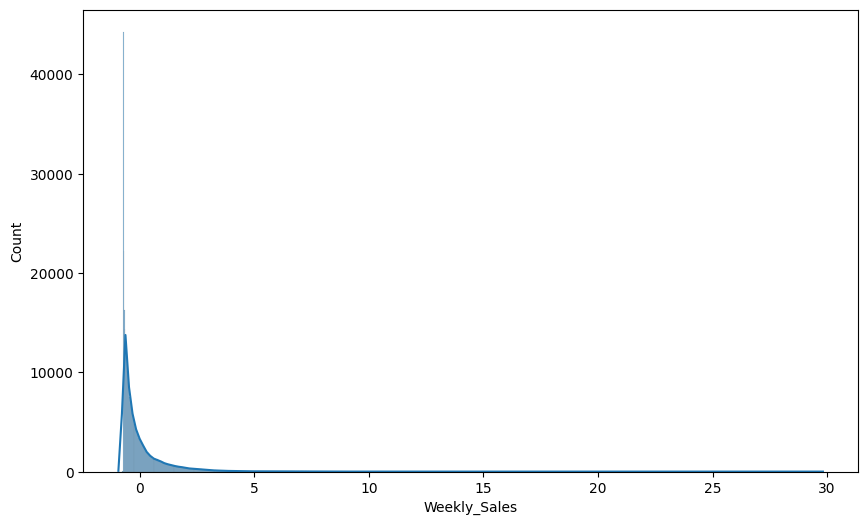

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], kde=True)
plt.show()

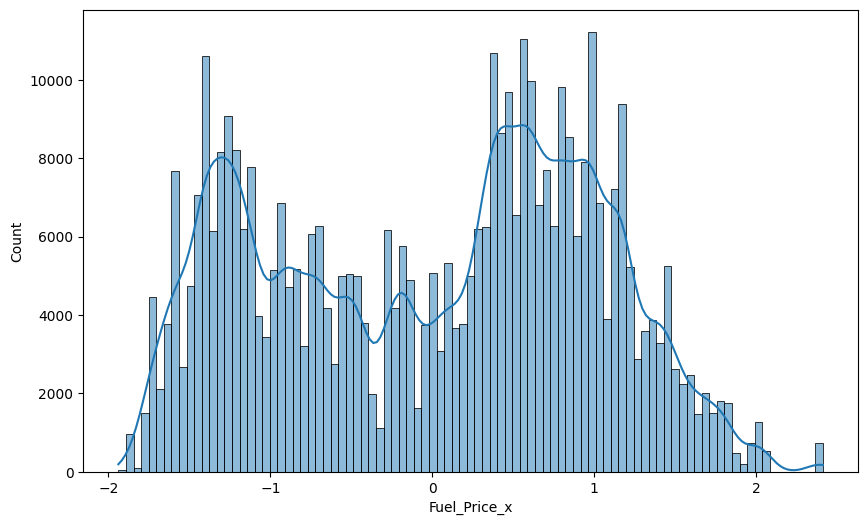

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fuel_Price_x'], kde=True)
plt.show()

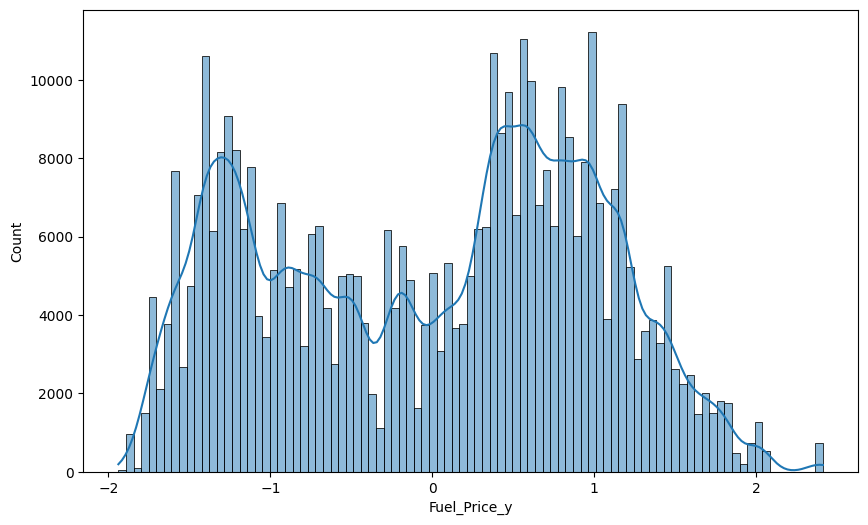

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fuel_Price_y'], kde=True)
plt.show()

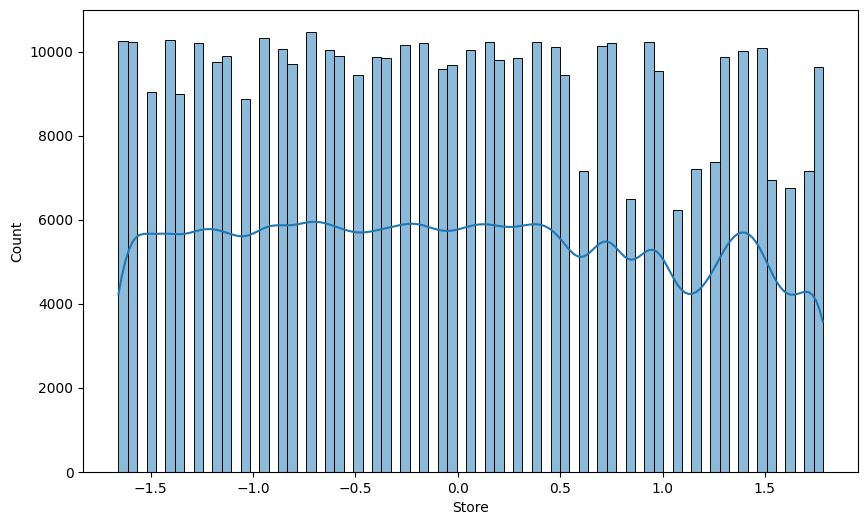

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Store'], kde=True)
plt.show()

In [ ]:
correlation_matrix = df.corr()

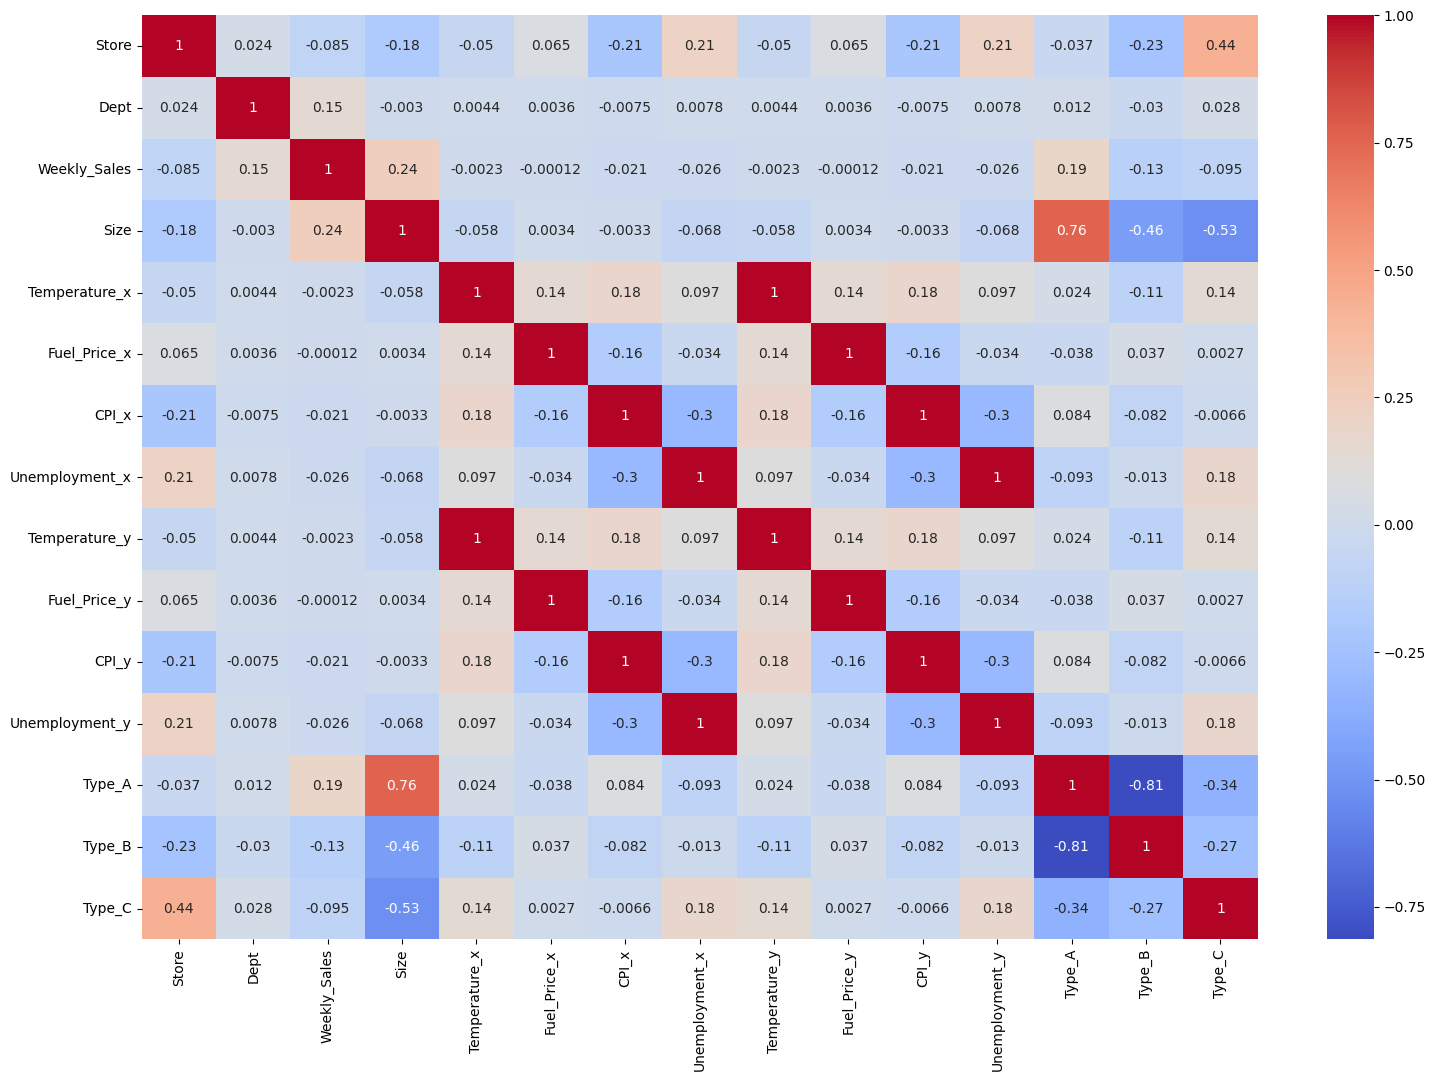

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

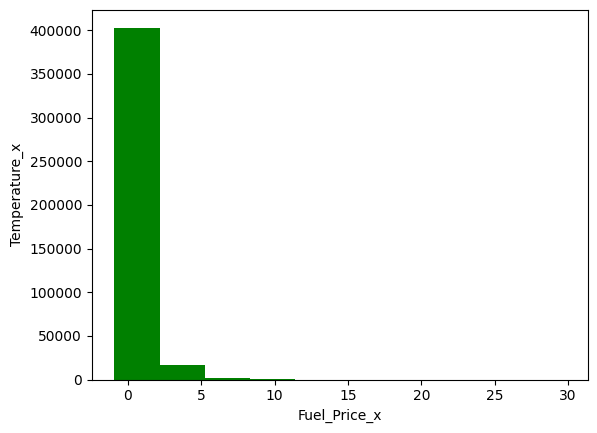

In [ ]:
plt.hist(df["Weekly_Sales"],color="green",bins=10)
plt.xlabel("Fuel_Price_x")
plt.ylabel("Temperature_x")
plt.show()

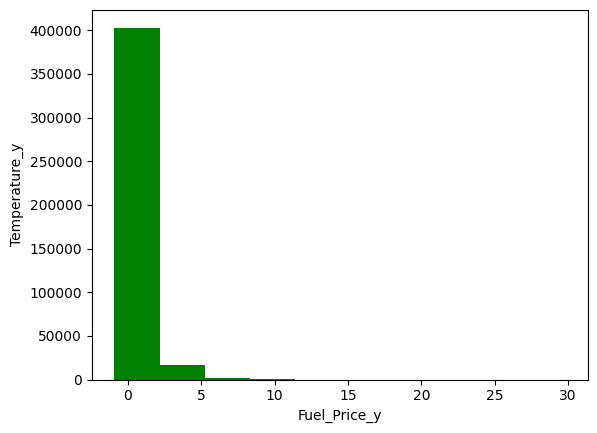

In [ ]:
plt.hist(df["Weekly_Sales"],color="green",bins=10)
plt.xlabel("Fuel_Price_y")
plt.ylabel("Temperature_y")
plt.show()

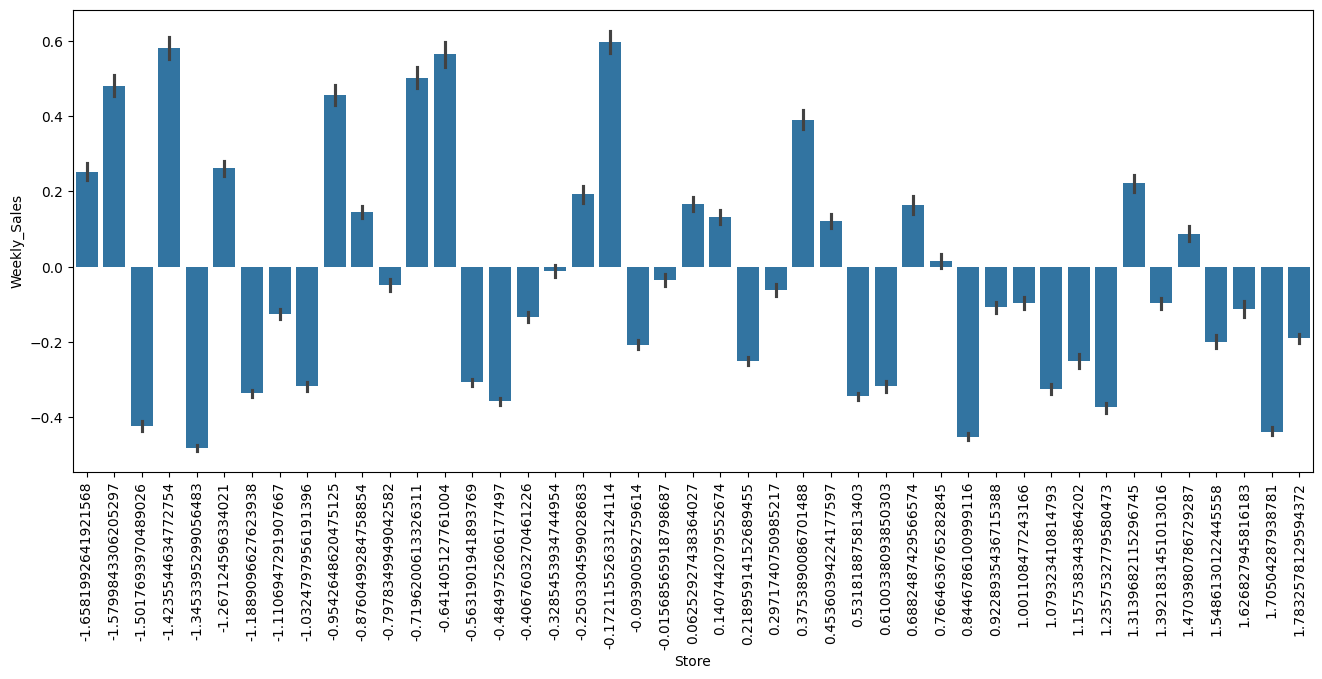

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(data = df, x = 'Store', y = 'Weekly_Sales')
plt.xticks(rotation=90)
plt.show()

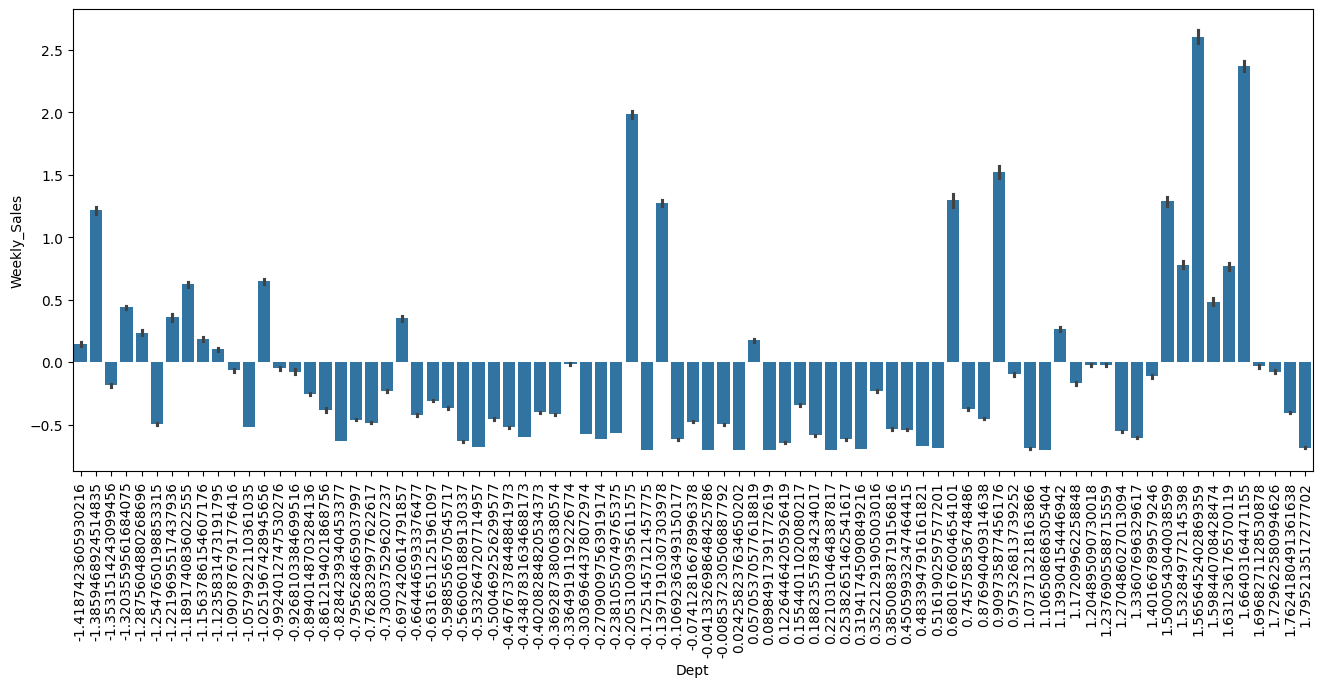

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(data = df, x = 'Dept', y = 'Weekly_Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw,uw


In [ ]:
wisker(df[ 'Dept'])

(-3.616038726076067, 3.7301461376284433)

In [ ]:
for i in['Dept','Weekly_Sales']:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])

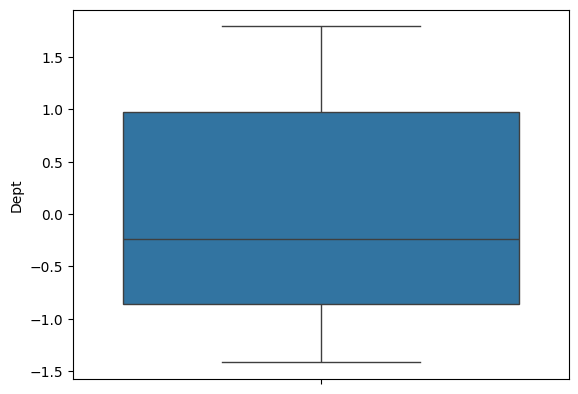

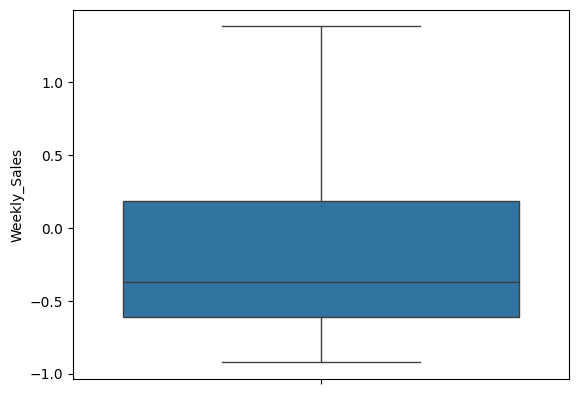

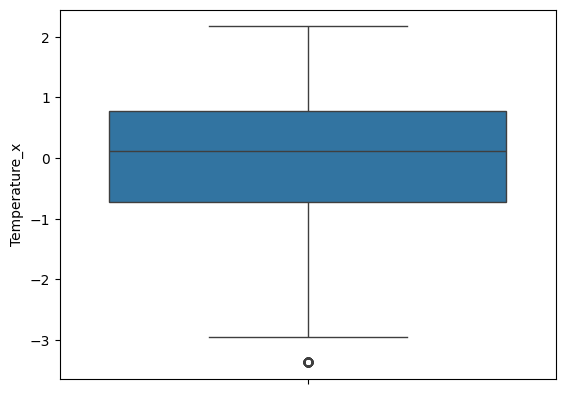

In [ ]:
for i in['Dept','Weekly_Sales','Temperature_x']:
  sns.boxplot(df[i])
  plt.show()

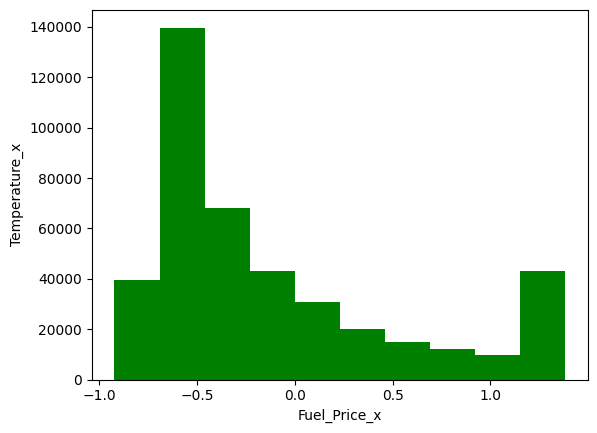

In [ ]:
plt.hist(df["Weekly_Sales"],color="green",bins=10)
plt.xlabel("Fuel_Price_x")
plt.ylabel("Temperature_x")
plt.show()

In [ ]:
from scipy.stats import zscore

In [ ]:
number_column = [
    'Weekly_Sales', 'Size', 'Temperature_x', 'Temperature_y',
    'Fuel_Price_x', 'Fuel_Price_y', 'CPI_y',
    'Unemployment_x', 'Unemployment_y'
]

In [ ]:
df_zscore = df[number_column].apply(zscore)

In [ ]:
z_outliers = (df_zscore.abs() > 3).any(axis=1)

In [ ]:
Q1 = df[number_column].apply(zscore)
Q3 = df[number_column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
iqr_outliers = ((df[number_column] < lower_bound) | (df[number_column] > upper_bound)).any(axis=1)

In [ ]:
outliers = df[z_outliers | iqr_outliers]


In [ ]:
print("Outliers identified:")
print(outliers)

Outliers identified:
           Store      Dept  Weekly_Sales      Size  Temperature_x  \
0      -1.658199 -1.418742      0.393782  0.239209      -0.963798   
1      -1.658199 -1.418742      1.323501  0.239209      -1.169783   
2      -1.658199 -1.418742      1.127829  0.239209      -1.092810   
3      -1.658199 -1.418742      0.150687  0.239209      -0.729625   
4      -1.658199 -1.418742      0.257435  0.239209      -0.736672   
...          ...       ...           ...       ...            ...   
421565  1.783258  1.762418     -0.681290 -0.303489       0.259647   
421566  1.783258  1.762418     -0.676018 -0.303489       0.260189   
421567  1.783258  1.762418     -0.656956 -0.303489      -0.304645   
421568  1.783258  1.762418     -0.670210 -0.303489      -0.196231   
421569  1.783258  1.762418     -0.656262 -0.303489      -0.067219   

        Fuel_Price_x     CPI_x  Unemployment_x  Temperature_y  Fuel_Price_y  \
0          -1.720834  1.018774        0.078201      -0.963798     -1.72

In [ ]:
x_columns = [col for col in df.columns if '_x' in col]
y_columns = [col for col in df.columns if '_y' in col]


desc_stats_x = df[x_columns].describe()
desc_stats_y = df[y_columns].describe()

print("Descriptive Statistics for X Columns:")
print(desc_stats_x)
print("\nDescriptive Statistics for Y Columns:")
print(desc_stats_y)

Descriptive Statistics for X Columns:
       Temperature_x  Fuel_Price_x         CPI_x  Unemployment_x
count   4.215700e+05  4.215700e+05  4.215700e+05    4.215700e+05
mean    1.101622e-15 -1.038248e-17 -5.042920e-16   -1.412557e-15
std     1.000001e+00  1.000001e+00  1.000001e+00    1.000001e+00
min    -3.368949e+00 -1.938930e+00 -1.152677e+00   -2.190362e+00
25%    -7.269148e-01 -9.335081e-01 -1.000512e+00   -5.738701e-01
50%     1.084102e-01  1.984094e-01  2.838879e-01   -5.060323e-02
75%     7.691897e-01  8.221635e-01  1.052499e+00    3.282957e-01
max     2.170975e+00  2.414263e+00  1.430847e+00    3.409399e+00

Descriptive Statistics for Y Columns:
       Temperature_y  Fuel_Price_y         CPI_y  Unemployment_y
count   4.215700e+05  4.215700e+05  4.215700e+05    4.215700e+05
mean    1.101622e-15 -1.038248e-17 -5.042920e-16   -1.412557e-15
std     1.000001e+00  1.000001e+00  1.000001e+00    1.000001e+00
min    -3.368949e+00 -1.938930e+00 -1.152677e+00   -2.190362e+00
25%    -7.269

Arjun, Nikhil, Mustaquim

In [ ]:


from sklearn.preprocessing import LabelEncoder

# Encode categorical features using Label Encoding
le = LabelEncoder()
for column in df.select_dtypes(include=['object']):
  df[column] = le.fit_transform(df[column])





from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the first few rows of the transformed DataFrame to verify
print(df.head())

   Store  Dept  Weekly_Sales      Size  Temperature_x  Fuel_Price_x     CPI_x  \
0    0.0   0.0      0.571040  0.630267       0.434149      0.050100  0.840500   
1    0.0   0.0      0.974121  0.630267       0.396967      0.038076  0.841941   
2    0.0   0.0      0.889287  0.630267       0.410861      0.021042  0.842405   
3    0.0   0.0      0.465647  0.630267       0.476419      0.044589  0.842707   
4    0.0   0.0      0.511927  0.630267       0.475147      0.076653  0.843008   

   Unemployment_x  Temperature_y  Fuel_Price_y     CPI_y  Unemployment_y  \
0        0.405118       0.434149      0.050100  0.840500        0.405118   
1        0.405118       0.396967      0.038076  0.841941        0.405118   
2        0.405118       0.410861      0.021042  0.842405        0.405118   
3        0.405118       0.476419      0.044589  0.842707        0.405118   
4        0.405118       0.475147      0.076653  0.843008        0.405118   

   Type_A  Type_B  Type_C  
0    True   False   False  


In [ ]:
numerical_cols = ['Weekly_Sales', 'Size', 'Temperature_x', 'Fuel_Price_x', 'CPI_y', 'Unemployment_x']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)
df[numerical_cols] = scaled_df

print("scaled data")
print(scaled_df)




scaled data
        Weekly_Sales      Size  Temperature_x  Fuel_Price_x     CPI_y  \
0           0.756273  0.239209      -0.963798     -1.720834  1.018774   
1           2.172553  0.239209      -1.169783     -1.773177  1.022498   
2           1.874477  0.239209      -1.092810     -1.847330  1.023697   
3           0.385956  0.239209      -0.729625     -1.744825  1.024476   
4           0.548570  0.239209      -0.736672     -1.605243  1.025255   
...              ...       ...            ...           ...       ...   
421565     -0.881430 -0.303489       0.259647      1.387032  0.531461   
421566     -0.873399 -0.303489       0.260189      1.360860  0.535467   
421567     -0.844361 -0.303489      -0.304645      1.393575  0.539472   
421568     -0.864551 -0.303489      -0.196231      1.325965  0.539564   
421569     -0.843303 -0.303489      -0.067219      1.136222  0.539003   

        Unemployment_x  
0             0.078201  
1             0.078201  
2             0.078201  
3          

In [ ]:
X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Data transformation")
print(X)
print(y)



Data transformation
        Store      Dept      Size  Temperature_x  Fuel_Price_x     CPI_x  \
0         0.0  0.000000  0.239209      -0.963798     -1.720834  0.840500   
1         0.0  0.000000  0.239209      -1.169783     -1.773177  0.841941   
2         0.0  0.000000  0.239209      -1.092810     -1.847330  0.842405   
3         0.0  0.000000  0.239209      -0.729625     -1.744825  0.842707   
4         0.0  0.000000  0.239209      -0.736672     -1.605243  0.843008   
...       ...       ...       ...            ...           ...       ...   
421565    1.0  0.989796 -0.303489       0.259647      1.387032  0.651876   
421566    1.0  0.989796 -0.303489       0.260189      1.360860  0.653427   
421567    1.0  0.989796 -0.303489      -0.304645      1.393575  0.654977   
421568    1.0  0.989796 -0.303489      -0.196231      1.325965  0.655013   
421569    1.0  0.989796 -0.303489      -0.067219      1.136222  0.654796   

        Unemployment_x  Temperature_y  Fuel_Price_y     CPI_y  Unem

In [ ]:

X = df.drop('Weekly_Sales', axis=1)  # Features
y = df['Weekly_Sales']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Encoding:")
print(X)
print(y)


Data Encoding:
        Store      Dept      Size  Temperature_x  Fuel_Price_x     CPI_x  \
0         0.0  0.000000  0.239209      -0.963798     -1.720834  0.840500   
1         0.0  0.000000  0.239209      -1.169783     -1.773177  0.841941   
2         0.0  0.000000  0.239209      -1.092810     -1.847330  0.842405   
3         0.0  0.000000  0.239209      -0.729625     -1.744825  0.842707   
4         0.0  0.000000  0.239209      -0.736672     -1.605243  0.843008   
...       ...       ...       ...            ...           ...       ...   
421565    1.0  0.989796 -0.303489       0.259647      1.387032  0.651876   
421566    1.0  0.989796 -0.303489       0.260189      1.360860  0.653427   
421567    1.0  0.989796 -0.303489      -0.304645      1.393575  0.654977   
421568    1.0  0.989796 -0.303489      -0.196231      1.325965  0.655013   
421569    1.0  0.989796 -0.303489      -0.067219      1.136222  0.654796   

        Unemployment_x  Temperature_y  Fuel_Price_y     CPI_y  Unemploym

                                                                        
                                                                      **ARBAZ**

Linear Model

In [ ]:
X = df.drop('Weekly_Sales', axis=1)  # Features
y = df['Weekly_Sales']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.9106715788873372
R-squared: 0.08683164965804291


Correlation and error component

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

In [ ]:
# Find the correlation between Weekly_Sales and other features
weekly_sales_correlation = correlation_matrix['Weekly_Sales'].sort_values(ascending=False)

In [ ]:
# Print the correlation coefficients
print("Correlation with Weekly Sales:")
print(weekly_sales_correlation)

Correlation with Weekly Sales:
Weekly_Sales      1.000000
Size              0.262088
Type_A            0.189746
Dept              0.102538
Fuel_Price_x      0.003405
Fuel_Price_y      0.003405
Temperature_y     0.002285
Temperature_x     0.002285
Unemployment_x   -0.020074
Unemployment_y   -0.020074
CPI_x            -0.031199
CPI_y            -0.031199
Store            -0.076752
Type_C           -0.109803
Type_B           -0.126743
Name: Weekly_Sales, dtype: float64


In [ ]:
# Identify features with high correlation
high_correlation_features = weekly_sales_correlation[
    (weekly_sales_correlation > 0.5) | (weekly_sales_correlation < -0.5)
]

In [ ]:
print("\nFeatures with High Correlation with Weekly Sales:")
print(high_correlation_features)


Features with High Correlation with Weekly Sales:
Weekly_Sales    1.0
Name: Weekly_Sales, dtype: float64


In [ ]:
# Calculate the error component (residuals)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

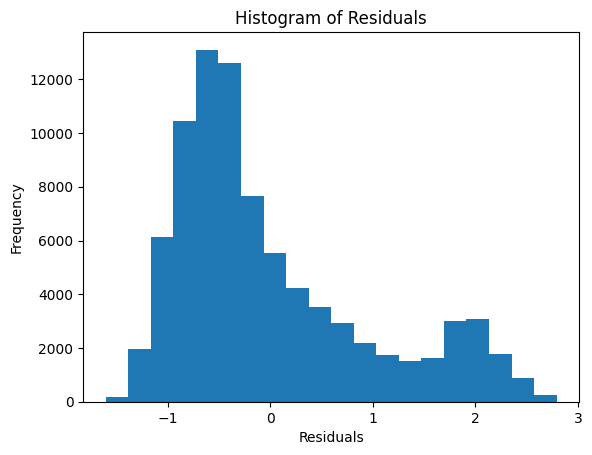

In [ ]:
# Analyze the error component
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

Assumption of linear regression

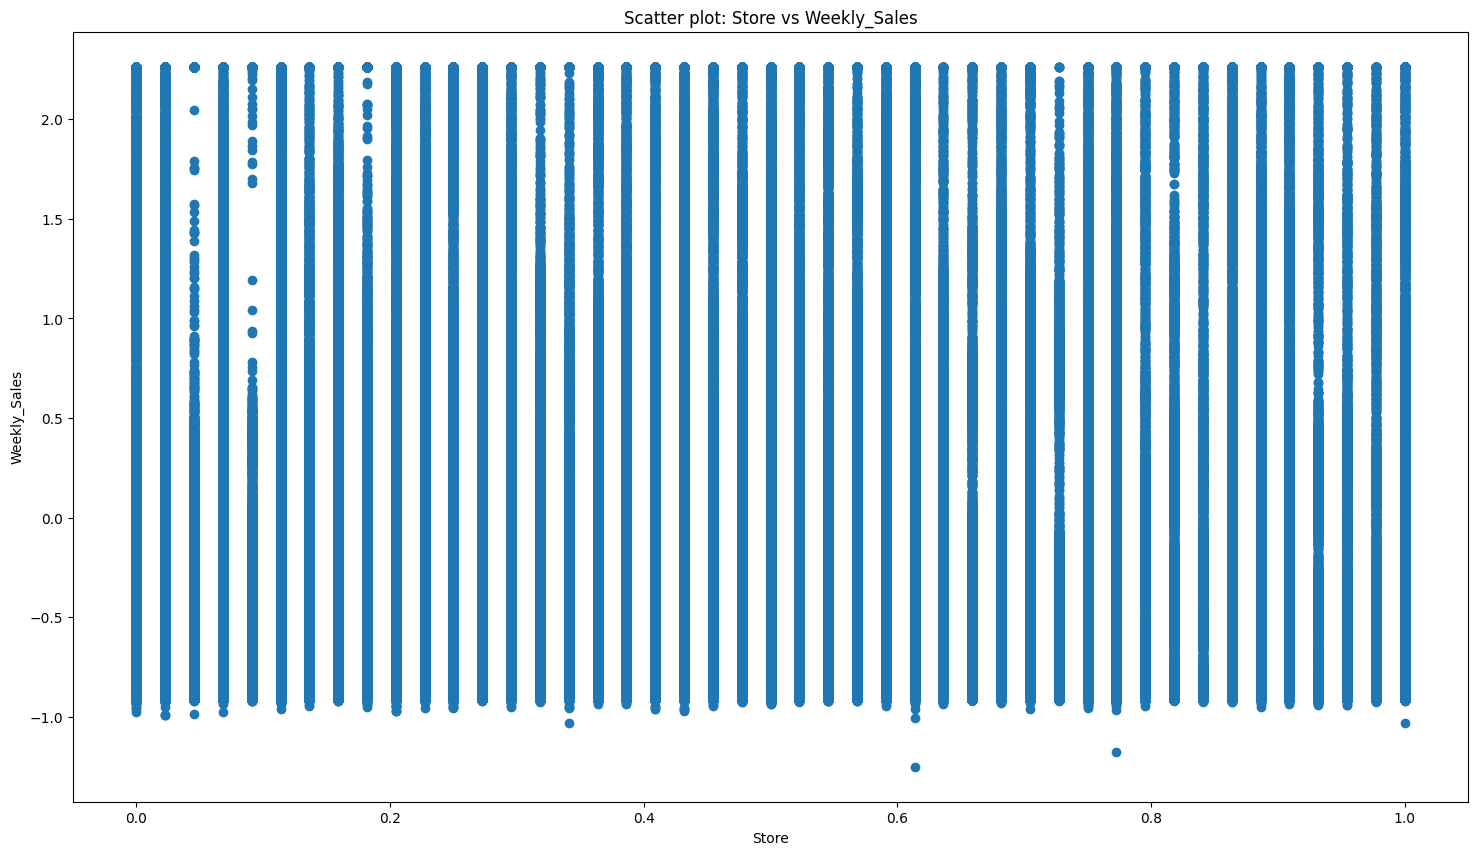

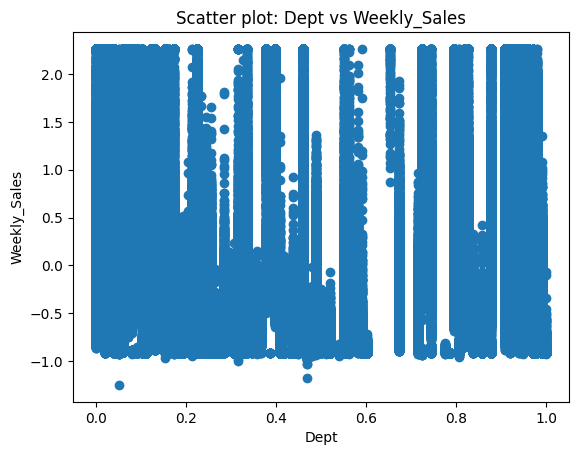

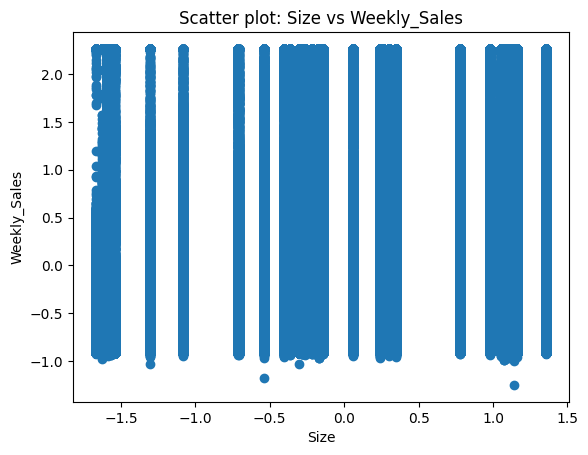

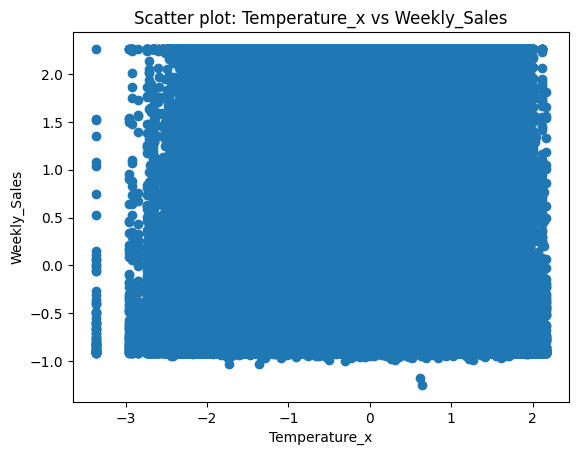

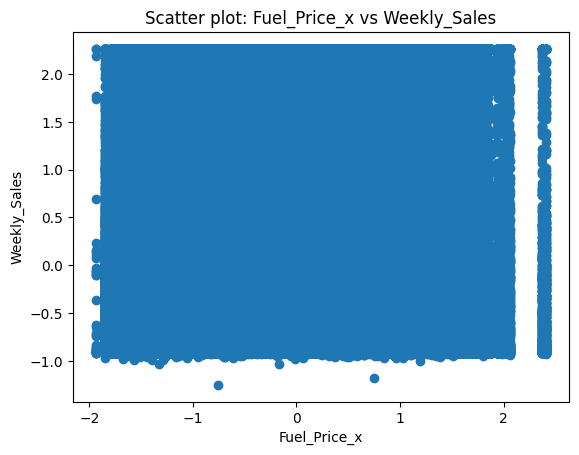

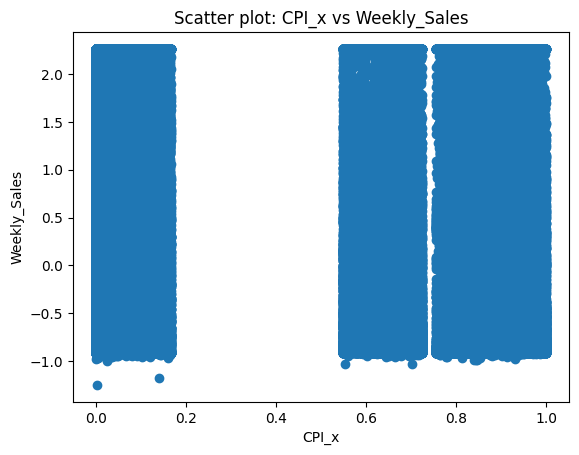

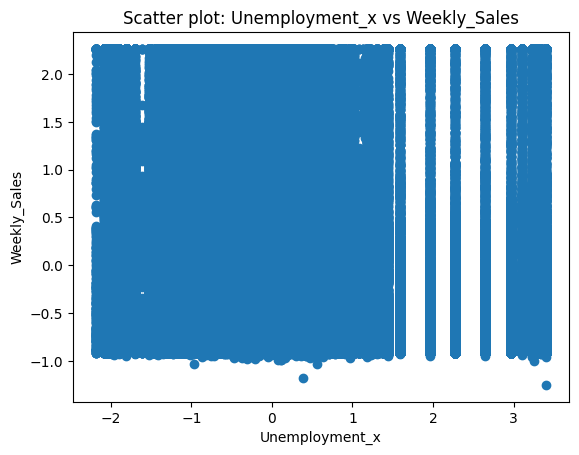

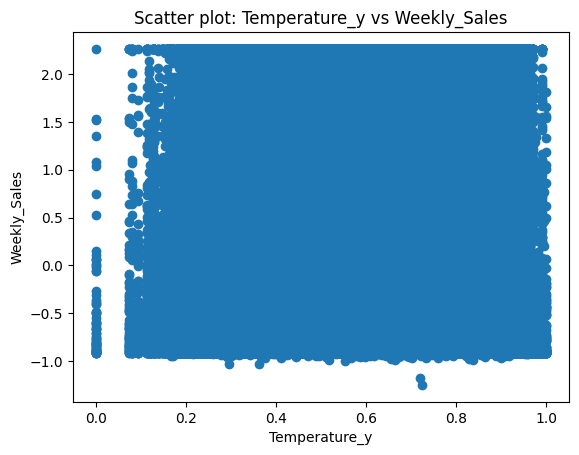

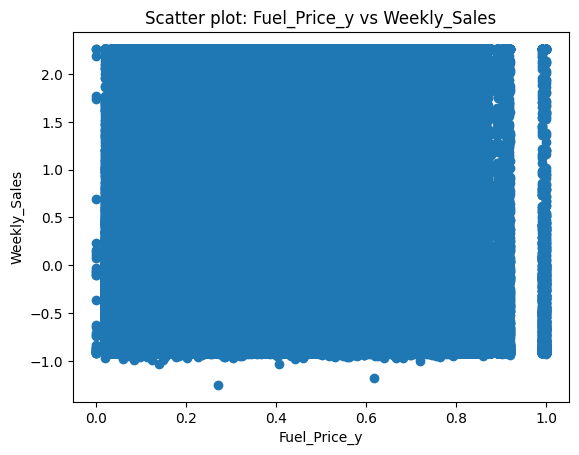

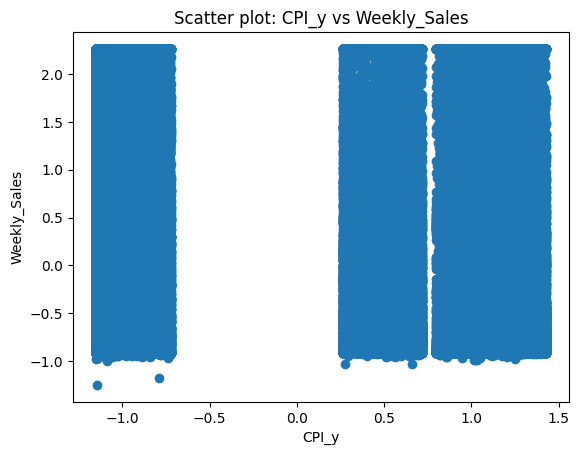

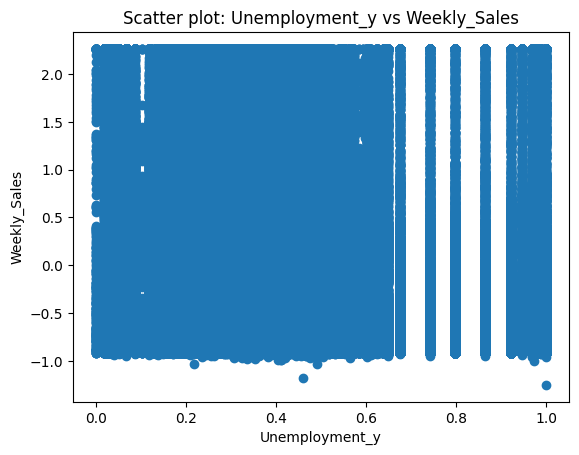

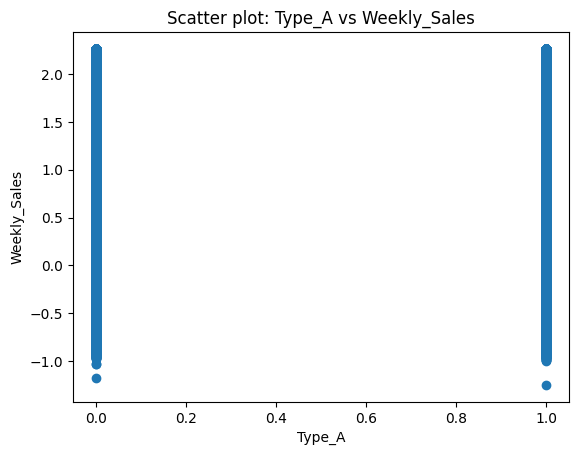

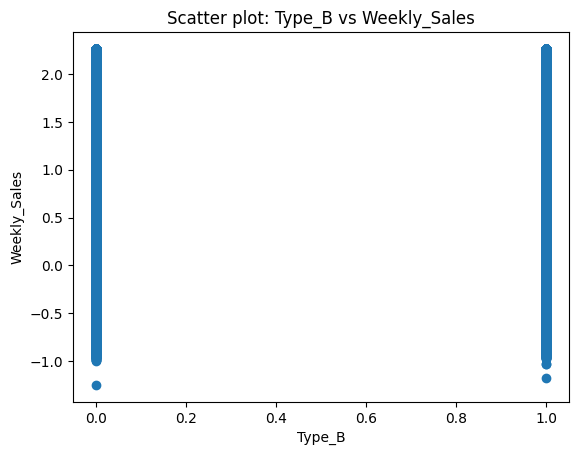

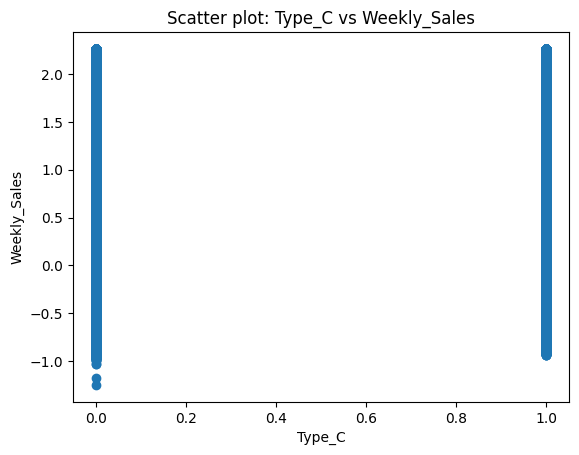

In [ ]:
# Assumption of linear regression

# 1. Linearity:
plt.figure(figsize=(18, 10))
for col in X.columns:
  plt.scatter(df[col], df['Weekly_Sales'])
  plt.xlabel(col)
  plt.ylabel('Weekly_Sales')
  plt.title(f'Scatter plot: {col} vs Weekly_Sales')
  plt.show()

In [ ]:
# 2. Independence of errors:
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")

Durbin-Watson statistic: 1.9979164619482506


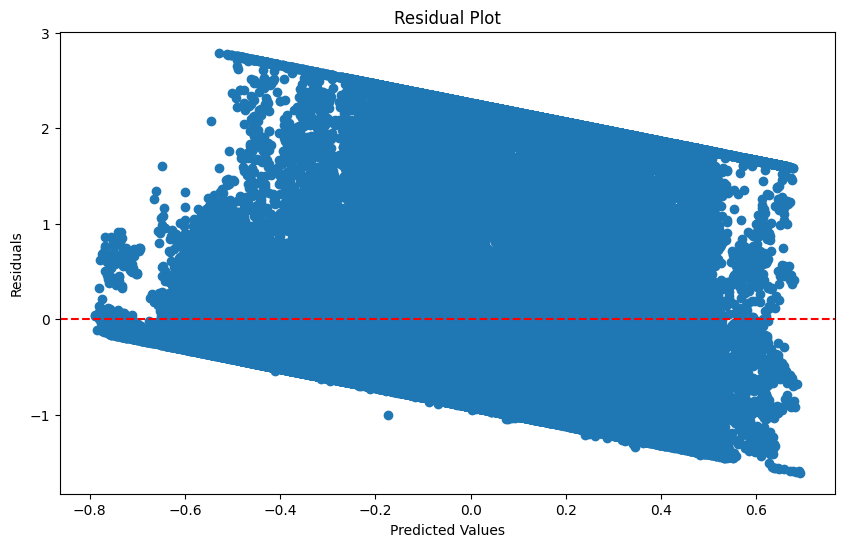

In [ ]:
# 3. Homoscedasticity:

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

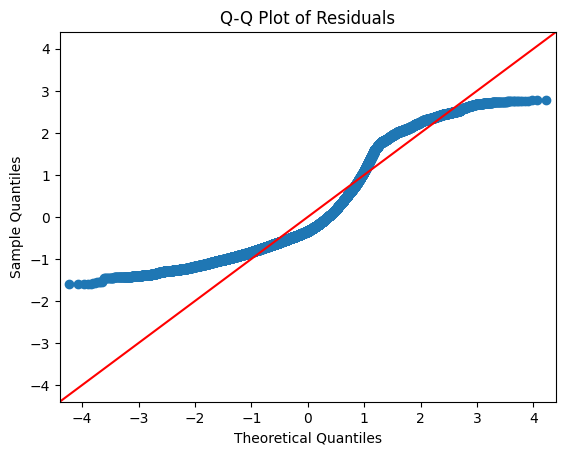

In [ ]:
# 4. Normality of errors:
import statsmodels.api as sm
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [ ]:
# 4. Normality of errors:
import scipy.stats as stats
shapiro_statistic, shapiro_p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_statistic}")
print(f"Shapiro-Wilk Test p-value: {shapiro_p_value}")

Shapiro-Wilk Test Statistic: 0.882406533109345
Shapiro-Wilk Test p-value: 5.881357389837009e-113


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 84314.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# 4. Normality of errors:
from scipy.stats import normaltest
normal_statistic, normal_p_value = normaltest(residuals)
print(f"Normal Test Statistic: {normal_statistic}")
print(f"Normal Test p-value: {normal_p_value}")

Normal Test Statistic: 10610.146181622475
Normal Test p-value: 0.0


AKSHAT

VIF (VARIANCE INFLATION FACTOR) IS A MEASURE OF AMOUNT OF MULTICOLLINEARITY IN REGRESSION ANALYSIS.Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop(columns=['Weekly_Sales']).select_dtypes(include=np.number)   # Exclude the target variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


           Feature       VIF
0            Store  1.114917
1             Dept  1.000626
2             Size  1.042133
3    Temperature_x       inf
4     Fuel_Price_x       inf
5            CPI_x       inf
6   Unemployment_x       inf
7    Temperature_y       inf
8     Fuel_Price_y       inf
9            CPI_y       inf
10  Unemployment_y       inf



Feature selection is the process of selecting a subset of relevant features for model construction. This helps in reducing overfitting, improving model performance, and reducing training time by removing irrelevant or redundant features.
1. Filter Method
2.Wrapper Method
3.Embedded Methods
4. Dimensionality Reduction

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the coefficients and intercept
print("Coefficient (Slope):", model.coef_)
print("Intercept:", model.intercept_)


Coefficient (Slope): [-1.99009904e-01  3.33123747e-01  2.98513415e-01 -9.37266582e+10
  4.19069447e+11  5.68136981e+12 -9.34654167e+10  5.19238485e+11
 -1.82429027e+12 -2.19907765e+12  5.23383990e+11  1.22619183e+11
  1.22619183e+11  1.22619183e+11]
Intercept: -2365382757003.6875


In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.9106715788873372
R-squared: 0.08683164965804291


In [ ]:
print(X.columns)  # Check feature names used during training


Index(['Store', 'Dept', 'Size', 'Temperature_x', 'Fuel_Price_x', 'CPI_x',
       'Unemployment_x', 'Temperature_y', 'Fuel_Price_y', 'CPI_y',
       'Unemployment_y'],
      dtype='object')


In [ ]:
print(X.columns)  # Check feature names used during training


Index(['Store', 'Dept', 'Size', 'Temperature_x', 'Fuel_Price_x', 'CPI_x',
       'Unemployment_x', 'Temperature_y', 'Fuel_Price_y', 'CPI_y',
       'Unemployment_y'],
      dtype='object')


In [ ]:
x_values = X.copy()  # Use the same features as X (training data)
print(x_values.head())

   Store  Dept      Size  Temperature_x  Fuel_Price_x     CPI_x  \
0    0.0   0.0  0.239209      -0.963798     -1.720834  0.840500   
1    0.0   0.0  0.239209      -1.169783     -1.773177  0.841941   
2    0.0   0.0  0.239209      -1.092810     -1.847330  0.842405   
3    0.0   0.0  0.239209      -0.729625     -1.744825  0.842707   
4    0.0   0.0  0.239209      -0.736672     -1.605243  0.843008   

   Unemployment_x  Temperature_y  Fuel_Price_y     CPI_y  Unemployment_y  
0        0.078201       0.434149      0.050100  1.018774        0.405118  
1        0.078201       0.396967      0.038076  1.022498        0.405118  
2        0.078201       0.410861      0.021042  1.023697        0.405118  
3        0.078201       0.476419      0.044589  1.024476        0.405118  
4        0.078201       0.475147      0.076653  1.025255        0.405118  


In [ ]:
x_values = df[['Fuel_Price_x']]  # Replace with the actual feature name
print(x_values.head())


   Fuel_Price_x
0     -1.720834
1     -1.773177
2     -1.847330
3     -1.744825
4     -1.605243


In [ ]:
x_values = df[['Fuel_Price_x']]  # Replace with the actual feature name
print(x_values.head())

   Fuel_Price_x
0     -1.720834
1     -1.773177
2     -1.847330
3     -1.744825
4     -1.605243


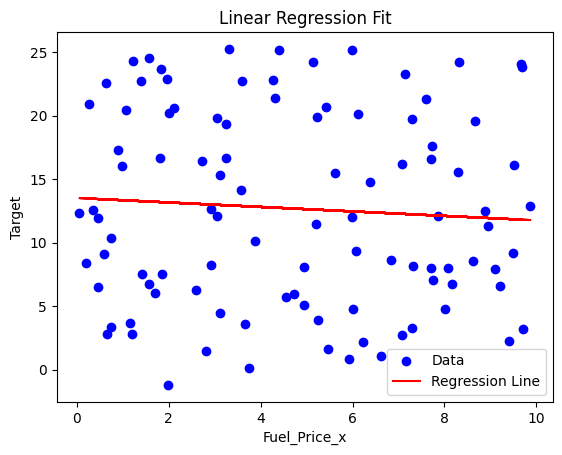

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a sample dataset
np.random.seed(42)
data = pd.DataFrame({
    'Fuel_Price_x': np.random.rand(100) * 10,
    'Target': 2.5 * np.random.rand(100) * 10 + np.random.randn(100)
})
X = data[['Fuel_Price_x']]  # Features
y = data['Target']          # Target variable
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Use the same features for prediction
x_values = X.copy()  # Ensure feature names match
y_pred = model.predict(x_values)
# Plot the results
plt.scatter(x_values, y, color='blue', label='Data')
plt.plot(x_values, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('Fuel_Price_x')
plt.ylabel('Target')
plt.legend()
plt.show()

Aman Kumar


Metrics r2,RMSE


In [ ]:
X_train.shape

(80, 1)

In [ ]:
X_test.shape

(20, 1)

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_test)

In [ ]:
# Calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
rmse

7.907478234889688

In [ ]:
r2

-0.01602425017846354

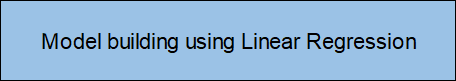

merge the data

In [ ]:
train_stores = pd.merge(left=train, right=stores, how='left', on='Store')  # Merging Train data and Stores Details

preprocess the data

In [ ]:
df = pd.merge(left=train_stores, right=features, how='left', on=['Store','Date','IsHoliday'])
#df.to_excel('data_sales.xlsx')
# Merging Train data, Stores and Features

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [ ]:
# One-hot encode 'Type' and other categorical features if needed
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

In [ ]:
# Convert 'Date' to datetime and extract features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
#handel missing value
df.fillna(df.mean(), inplace=True)

Split Data into Features and Target Variable

In [ ]:
# Define target and features
X = df.drop(['Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")


Mean Squared Error: 473240065.37808853
R-squared: 0.09249014453039162


In [ ]:
# Get the coefficients of the features
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


              Coefficient
Store         -142.142418
Dept           110.228230
IsHoliday      427.579797
Size             0.096678
Temperature      5.568651
Fuel_Price     341.010605
MarkDown1        0.027760
MarkDown2        0.001530
MarkDown3        0.100471
MarkDown4        0.013001
MarkDown5        0.088271
CPI            -24.139871
Unemployment  -260.838753
Type_B        -365.949449
Type_C        5865.230899
Year          -284.206095
Month          164.202134
Day            -16.166739


Regularization L1,L2,L3

L1 Regularization

# Split data into training and validation sets

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
# Apply L1 regularization
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
# Predict and evaluate
y_pred = lasso.predict(X_test)
mse_l1 = mean_squared_error(y_test, y_pred)
print("L1 Regularization (Lasso) MSE:", mse_l1)

L1 Regularization (Lasso) MSE: 473238681.6813954


L2 Regularization (Ridge Regression)

In [ ]:
# Apply L2 regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [ ]:
# Predict and evaluate
y_pred = ridge.predict(X_test)
mse_l2 = mean_squared_error(y_test, y_pred)
print("L2 Regularization (Ridge) MSE:", mse_l2)

L2 Regularization (Ridge) MSE: 473240056.74610925


L3 Regularization (Elastic Net)

In [ ]:
# Apply Elastic Net regularization
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

ElasticNet()

In [ ]:
# Predict and evaluate
y_pred = elastic_net.predict(X_test)
mse_l3 = mean_squared_error(y_test, y_pred)
print("Elastic Net Regularization (L3) MSE:", mse_l3)

Elastic Net Regularization (L3) MSE: 474569102.9521341


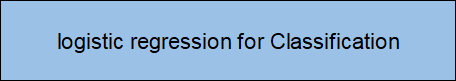

Define Target Variable

In [ ]:
# Define target variable as 1 if weekly sales are above median, else 0
median_sales = df['Weekly_Sales'].median()
df['high_weekly_sales'] = np.where(df['Weekly_Sales'] > median_sales, 1, 0)


In [ ]:
# Define features (excluding target and irrelevant columns)
X = df.drop(['Weekly_Sales', 'high_weekly_sales', 'Date'], axis=1)
y = df['high_weekly_sales']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import roc_curve,auc,accuracy_score,classification_report,confusion_matrix,mean_absolute_error, mean_squared_error,r2_score

In [ ]:
from sklearn.linear_model import  LogisticRegression
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5894157553905638
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.54      0.57     42103
           1       0.58      0.64      0.61     42211

    accuracy                           0.59     84314
   macro avg       0.59      0.59      0.59     84314
weighted avg       0.59      0.59      0.59     84314

Confusion Matrix:
 [[22883 19220]
 [15398 26813]]


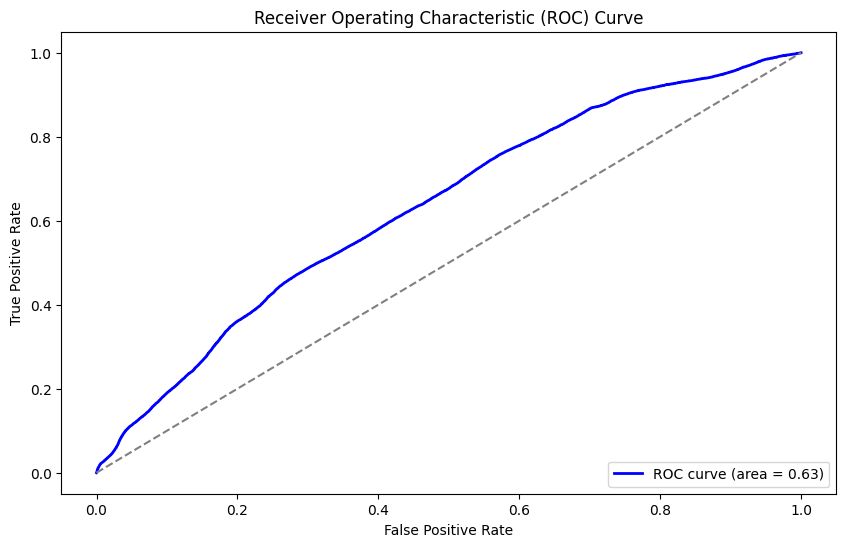

In [ ]:
#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

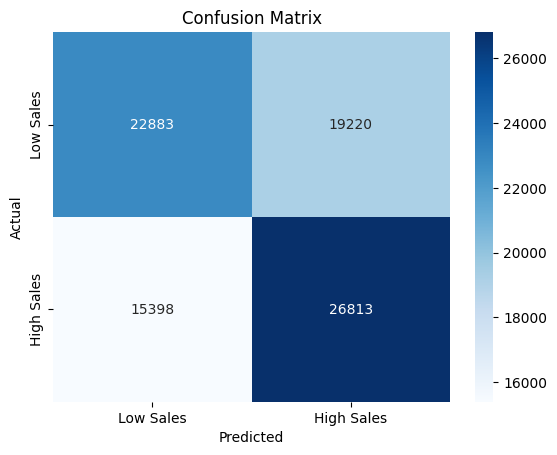

In [ ]:
# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Sales', 'High Sales'], yticklabels=['Low Sales', 'High Sales'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: Decison Tree

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_y_pred))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))

Decision Tree Accuracy: 0.9593898996607918
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     42103
           1       0.96      0.96      0.96     42211

    accuracy                           0.96     84314
   macro avg       0.96      0.96      0.96     84314
weighted avg       0.96      0.96      0.96     84314

Decision Tree Confusion Matrix:
 [[40424  1679]
 [ 1745 40466]]


In [ ]:
# ROC Curve for Decision Tree
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
dt_roc_auc = auc(dt_fpr, dt_tpr)

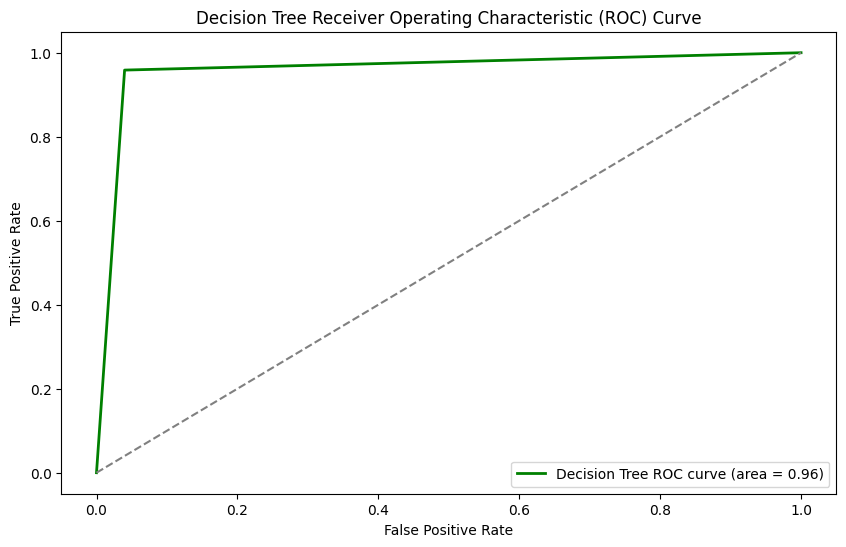

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(dt_fpr, dt_tpr, color='green', lw=2, label=f'Decision Tree ROC curve (area = {dt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

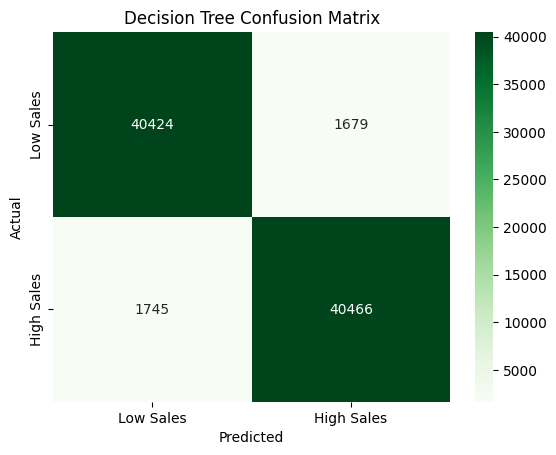

In [ ]:
# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Low Sales', 'High Sales'], yticklabels=['Low Sales', 'High Sales'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [ ]:
# prompt: model performance matrix



# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

performance_metrics = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R-squared'],
    'Value': [mae, rmse, r2]
})

performance_metrics

Mean Absolute Error: 0.41058424460943616
Root Mean Squared Error: 0.6407684797252718
R-squared: -0.642339673141999


,Metric,Value
0,MAE,0.410584
1,RMSE,0.640768
2,R-squared,-0.642340


In [ ]:
# hyperparameter of decision tree

dt_model = DecisionTreeClassifier(
    criterion='gini',  # 'gini' or 'entropy' for impurity measure
    splitter='best',  # 'best' or 'random' for splitting strategy
    max_depth=None,  # Maximum depth of the tree (None means no limit)
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    max_features=None,  # Number of features to consider when looking for the best split (None means consider all)
    random_state=42  # Seed for reproducibility
)

                                                                   **SHUBHI**

In [ ]:
# prompt: Random forest

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))

Random Forest Accuracy: 0.8292335792395095
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83     42103
           1       0.85      0.80      0.83     42211

    accuracy                           0.83     84314
   macro avg       0.83      0.83      0.83     84314
weighted avg       0.83      0.83      0.83     84314

Random Forest Confusion Matrix:
 [[35940  6163]
 [ 8235 33976]]


In [ ]:
# ROC Curve for Random Forest
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_roc_auc = auc(rf_fpr, rf_tpr)

In [ ]:
# Feature Importance for Random Forest
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

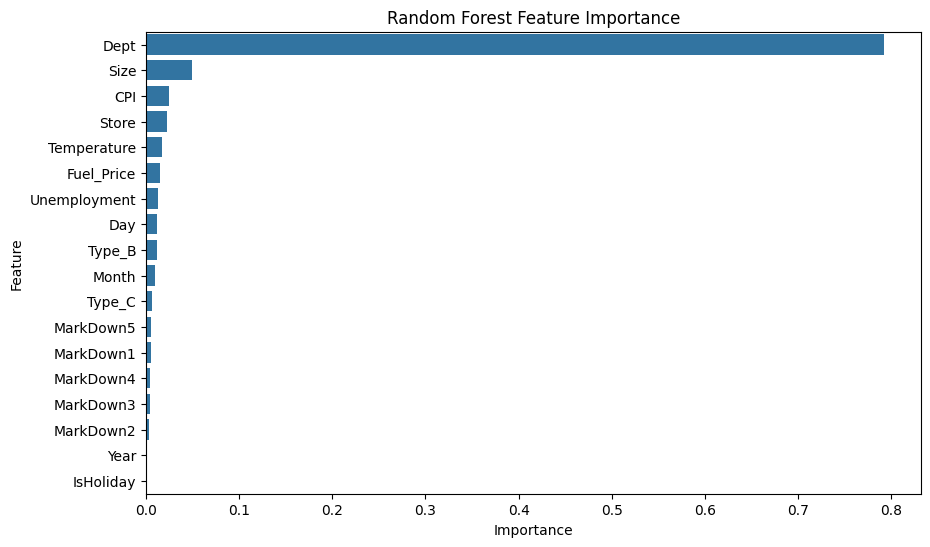

In [ ]:
# Plot Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
#  hyperparameters of rf

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model with various hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    criterion='gini',  # 'gini' or 'entropy' for impurity measure
    max_depth=None,  # Maximum depth of the tree (None means no limit)
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    max_features='auto',  # Number of features to consider when looking for the best split ('auto', 'sqrt', 'log2', or a number)
    bootstrap=True,  # Whether bootstrap samples are used when building trees
    random_state=42  # Seed for reproducibility
)

In [ ]:
#  Model building using Decision Tree

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict on the test set
dt_y_pred = dt_model.predict(X_test)

In [ ]:
# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_y_pred))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))

Decision Tree Accuracy: 0.9593898996607918
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     42103
           1       0.96      0.96      0.96     42211

    accuracy                           0.96     84314
   macro avg       0.96      0.96      0.96     84314
weighted avg       0.96      0.96      0.96     84314

Decision Tree Confusion Matrix:
 [[40424  1679]
 [ 1745 40466]]


                                                                    **RITIKA**

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
# Model building using randomforest

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))

Random Forest Accuracy: 0.8292335792395095
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83     42103
           1       0.85      0.80      0.83     42211

    accuracy                           0.83     84314
   macro avg       0.83      0.83      0.83     84314
weighted avg       0.83      0.83      0.83     84314

Random Forest Confusion Matrix:
 [[35940  6163]
 [ 8235 33976]]


In [ ]:
#  make the input model only necessary columns for user


# Only keep necessary columns for the model input
necessary_columns = ['Store', 'Temperature', 'Fuel_Price',  'Year', 'Month', 'Day']


X = df[necessary_columns]  # Use only the necessary columns for the input features
y = df['Weekly_Sales']  # Assuming 'Weekly_Sales' is your target variable


# Rest of your code for splitting data, training, and evaluating the model will remain the same.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

In [ ]:
#  take new input from user for prediction

def get_user_input_for_prediction():
  """Gets input from the user for predicting weekly sales."""

  store = int(input("Enter Store Number: "))
  temperature = float(input("Enter Temperature: "))
  fuel_price = float(input("Enter Fuel Price: "))
  year = int(input("Enter Year: "))
  month = int(input("Enter Month: "))
  day = int(input("Enter Day: "))

  user_input = pd.DataFrame({
      'Store': [store],
      'Temperature': [temperature],
      'Fuel_Price': [fuel_price],
      'Year': [year],
      'Month': [month],
      'Day': [day]
  })

  return user_input


In [ ]:
#  predict the weekly sales for new user input

def predict_weekly_sales(user_input):
  """Predicts weekly sales based on user input."""

  # Remove the line causing the error since there is no 'Type' column in the user_input:
  # user_input = pd.get_dummies(user_input, columns=['Type'], drop_first=True)

  # Ensure that user input has the same columns as your training data
  for column in X_train.columns:
      if column not in user_input.columns:
          user_input[column] = 0

  # Make sure that the order of columns in user input matches X_train
  user_input = user_input[X_train.columns]

  predicted_sales = model.predict(user_input)
  return predicted_sales[0]

# Get user input
user_input_df = get_user_input_for_prediction()


# Predict weekly sales
predicted_sales = predict_weekly_sales(user_input_df)
print("Predicted Weekly Sales:", predicted_sales)